In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [35]:
iris=load_iris()
y=iris.target
x=iris.data

In [36]:
df=pd.DataFrame(data=iris.data , columns=iris.feature_names)

In [37]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Scaling the data


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
X_scaled=StandardScaler().fit_transform(df)

In [40]:
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Covariance matrix

In [41]:
features=X_scaled.T
cov_matrix=np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Eigen Decompositition

In [42]:
values,vectors= np.linalg.eig(cov_matrix)
values[:5]

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [43]:
vectors[:5]

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [44]:
variances=[]
for i in range(len(values)):
  variances.append(values[i]/np.sum(values))

print(np.sum(variances))
print(variances)

1.0
[0.7296244541329989, 0.22850761786701754, 0.03668921889282865, 0.005178709107154905]


In [45]:
projected_1=X_scaled.dot(vectors.T[0])
projected_2=X_scaled.dot(vectors.T[1])

In [46]:
res=pd.DataFrame(projected_1, columns=['PC1'])
res['PC2']=projected_2
res['Y']=y
res.head()

,PC1,PC2,Y
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


VIZUALIZATION

<Axes: xlabel='PC1'>

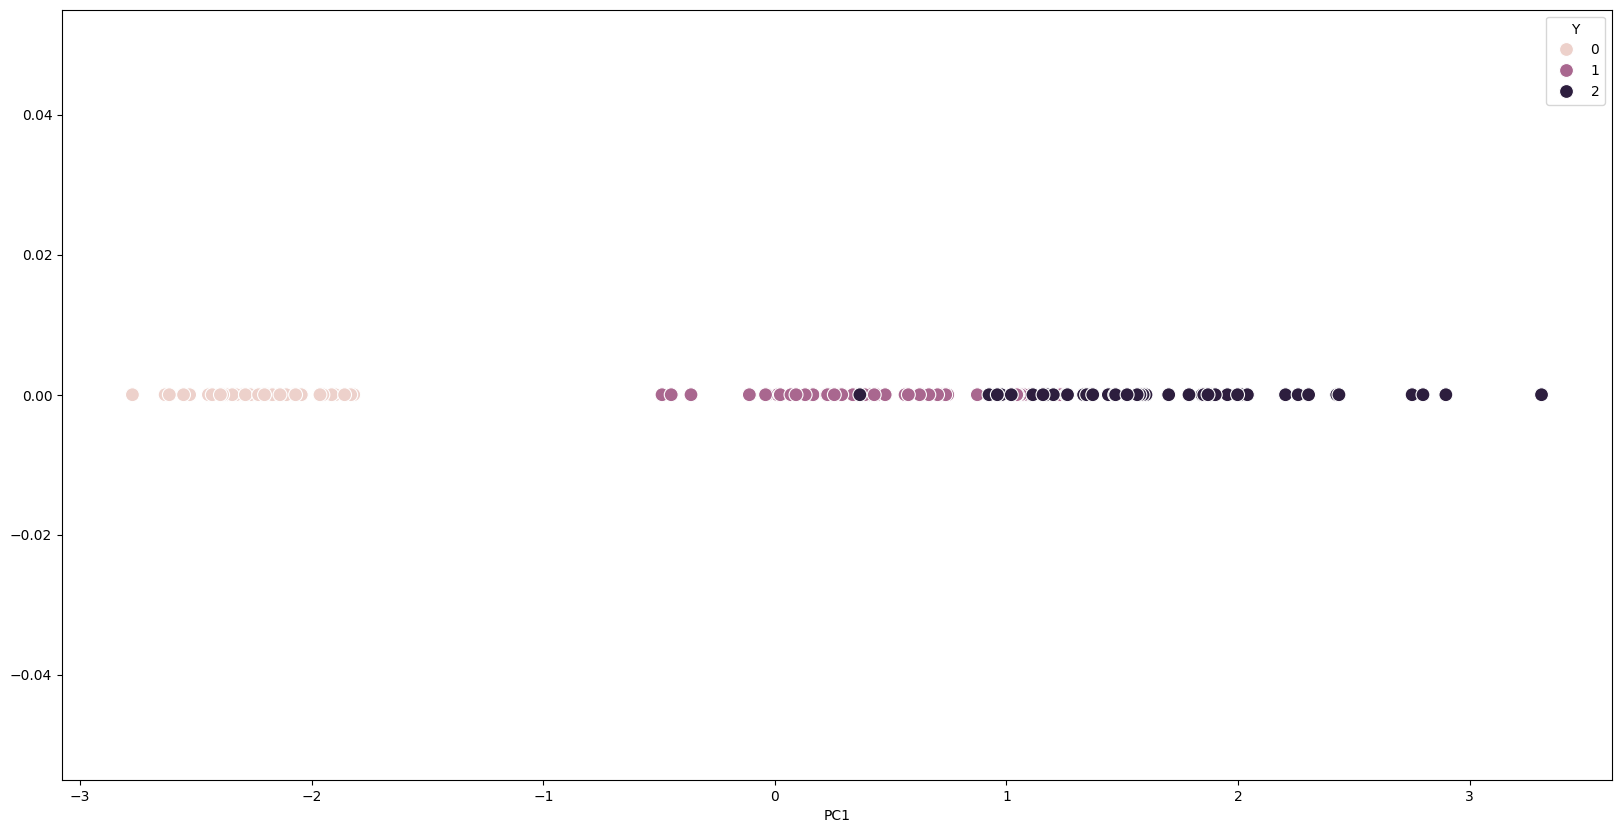

In [58]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=res['PC1'], y=[0] * len(res), hue=res['Y'], s=100)

<Axes: xlabel='PC1', ylabel='None'>

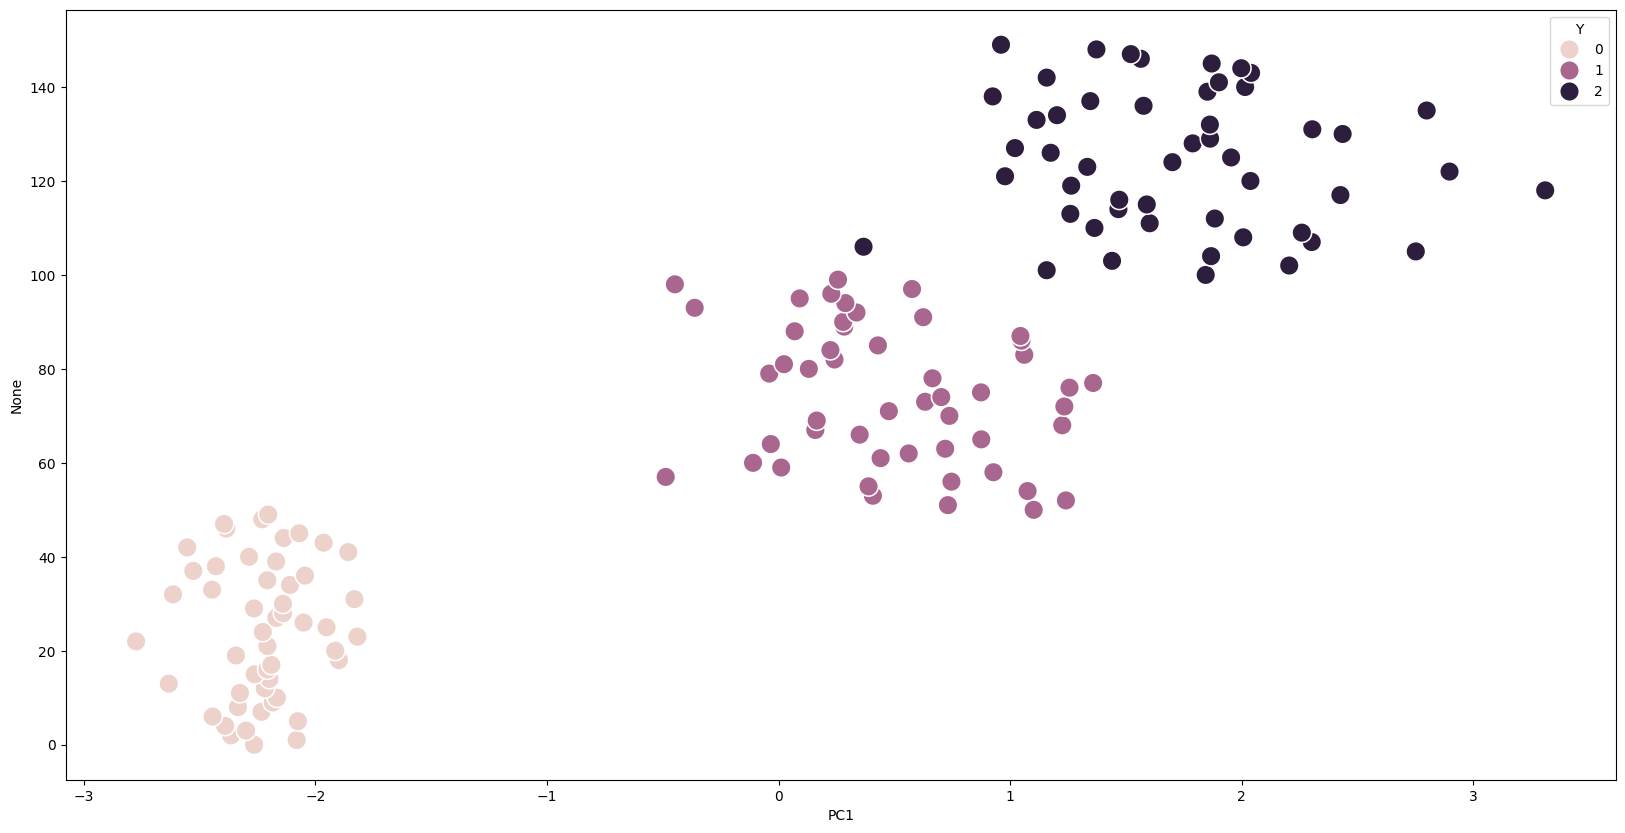

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.scatterplot(x=res['PC1'], y=res.index, hue=res['Y'], s=200)

